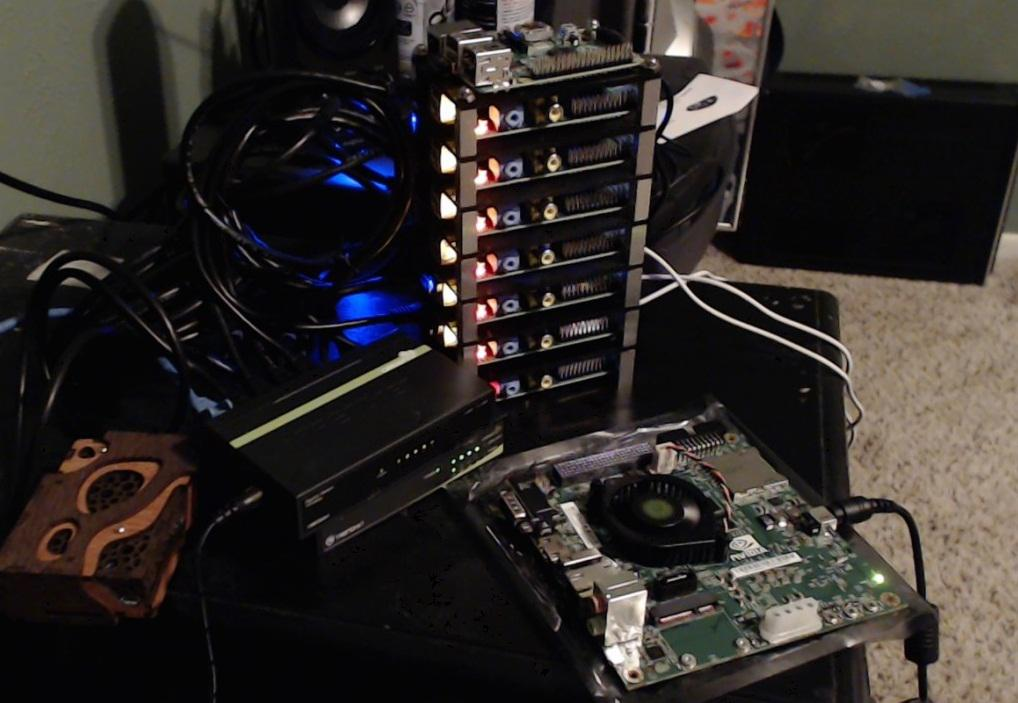

In [1]:
import numpy as np
from PIL import Image as image
from IPython.display import display, Image
from io import BytesIO

img = np.array(image.open('main.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [3]:
temp = np.array(image.open('template.jpg'))
f = BytesIO()
image.fromarray(temp.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

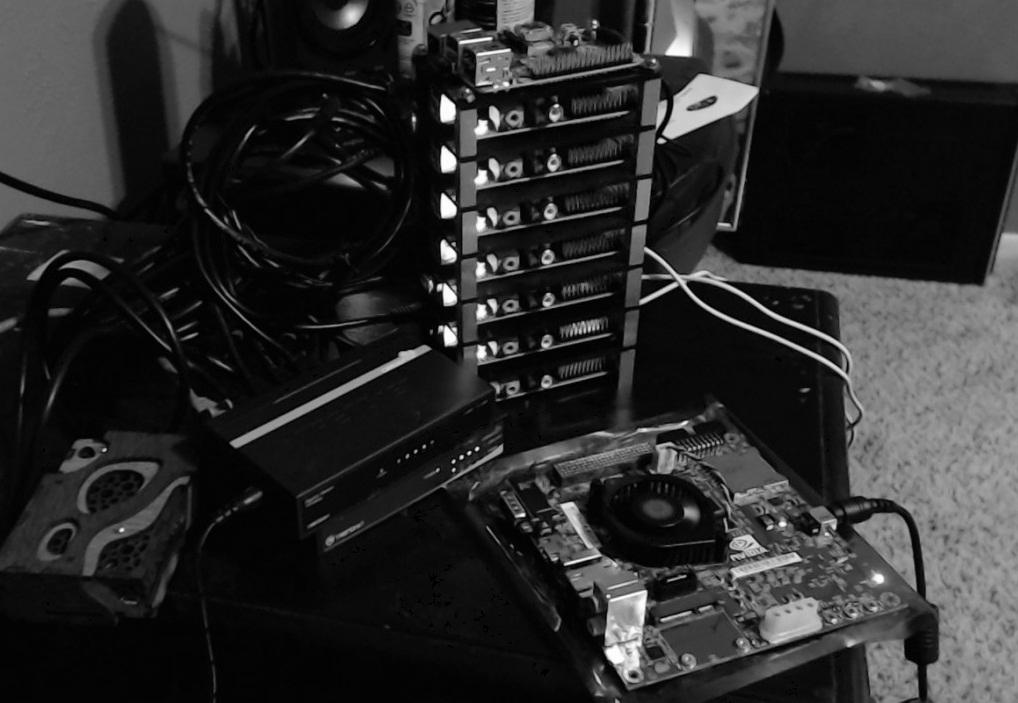

In [5]:
gray = np.zeros((img.shape[0], img.shape[1]))

for i in range(len(img)):
    for j in range(len(img[i])):
        gray[i][j] = 0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2]

f = BytesIO()
image.fromarray(gray.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [8]:
temp_gray = np.zeros((temp.shape[0], temp.shape[1]))

for i in range(len(temp)):
    for j in range(len(temp[i])):
        temp_gray[i][j] = 0.299*temp[i][j][0] + 0.587*temp[i][j][1] + 0.114*temp[i][j][2]

f = BytesIO()
image.fromarray(temp_gray.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

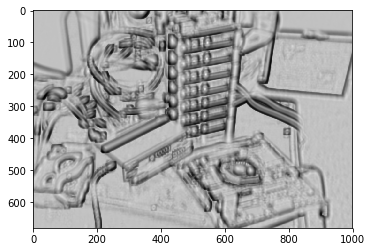

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

h, w = temp_gray.shape
y2 = np.sum(temp_gray**2)
match = np.zeros((gray.shape[0]-h, gray.shape[1]-w))

for i in range(gray.shape[0]-h):
    for j in range(gray.shape[1]-w):
        x2 = np.sum(gray[i:i+h, j:j+w]**2)
        z = np.sqrt(x2*y2)
        match[i, j] = np.sum(np.multiply(gray[i:i+h, j:j+w], temp_gray)) / z

'''for i in range(match.shape[0]):
    for j in range(match.shape[1]):
        if match[i][j] > 0.85:
            match[i][j] = 0
        else:
            match[i][j] = 255'''

plt.imshow(match, plt.get_cmap('gray'))
plt.show()

In [23]:
np.clip()

[[0.78599054 0.78527543 0.78440435 ... 0.         0.         0.        ]
 [0.78501698 0.78419512 0.7833779  ... 0.         0.         0.        ]
 [0.78376529 0.7830803  0.78245106 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
